# Visualizations for ABS
Below is the code used to create the visualizations from the [2019 Annual Business Survey Data](https://www.census.gov/data/developers/data-sets/abs.2019.html)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Load the DataFrames
business_owner_characteristics = pd.read_csv(r'Data\business_owner_characteristics.csv')

business_characteristics = pd.read_csv(r'Data\business_characteristics.csv')

company_summary = pd.read_csv(r'Data\company_summary.csv')

#state_company_summary = pd.read_csv(r'Data\state_company_summary.csv')

tech_characteristics = pd.read_csv(r'Data\tech_characteristics.csv')

## Overall Owner Distributions Across all Industry Sectors
Let's look at owner demographics for businesses across all industry sectors

In [3]:
business_owner_characteristics = business_owner_characteristics[business_owner_characteristics['IndustrySector'] == 'Total for all sectors']

If we wanted to look at the breakdown between hispanic and non-hispanic business owners, we could drill down to the data where all other categories includes aggregates except for the ethnicity

In [4]:
business_owner_ethnicity = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] != 'All owners of respondent firms')]

Since there are multiple questions (as seen by the QuestionDescription), we can aggregate the like values (Non/Hispanic) and get the mean to account for any variations in the differences between the number of responses for each question.

In [5]:
non_total_owner_ethnicity = business_owner_ethnicity.groupby('OwnerEthnicity')['NumberOfOwners'].mean()

Plotting the data

Text(0, 0.5, 'Owners in Millions')

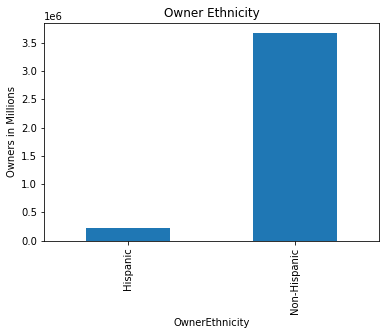

In [6]:
non_total_owner_ethnicity.plot(kind='bar')
plt.title('Owner Ethnicity')
plt.ylabel('Owners in Millions')
#plt.savefig(r'Visuals\OwnerEthnicity.png')

Let's do the same but now look at the breakdown by race

In [7]:
#unique values for race
business_owner_race = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerRace'] != 'All owners of respondent firms') & (business_owner_characteristics['OwnerRace'] != 'Minority') & (business_owner_characteristics['OwnerRace'] != 'Nonminority')]

Again, we want to account for any variations in the number of responses for different questions

In [8]:
non_total_owner_race = business_owner_race.groupby('OwnerRace')['NumberOfOwners'].mean()

Now plotting the data

Text(0.5, 0, 'Owners in Millions')

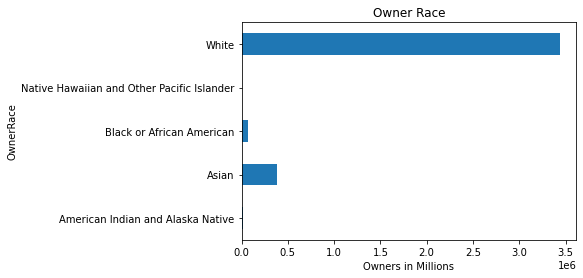

In [9]:
non_total_owner_race.plot(kind='barh')
plt.title('Owner Race')
plt.xlabel('Owners in Millions')
#plt.savefig(r'Visuals\OwnerRace.png')

Let's look at how the breakdown compares for business owners by sex

In [10]:
#Unique values for sex
business_owner_sex = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [11]:
non_total_owner_sex = business_owner_sex.groupby('OwnerSex')['NumberOfOwners'].mean()

Text(0, 0.5, 'Owners in Millions')

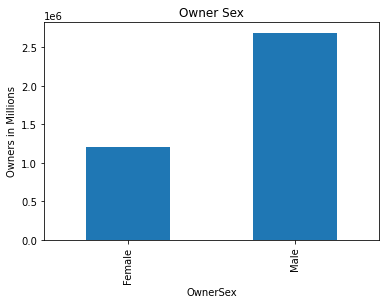

In [12]:
non_total_owner_sex.plot(kind='bar')
plt.title('Owner Sex')
plt.ylabel('Owners in Millions')
#plt.savefig(r'Visuals\OwnerSex.png')

For veteran status we could do the following:

In [13]:
#Owner Veteran Status
business_owner_vetstatus = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [14]:
owner_vet_status = business_owner_vetstatus.groupby('VeteranStatus')['NumberOfOwners'].mean()

Text(0, 0.5, 'Owners in Millions')

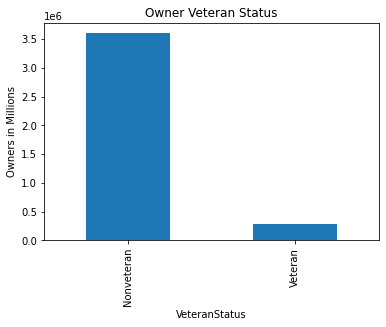

In [15]:
owner_vet_status.plot(kind='bar')
plt.title('Owner Veteran Status')
plt.ylabel('Owners in Millions')
#plt.savefig(r'Visuals\OwnerVeteranStatus.png')